<a href="https://colab.research.google.com/github/daniellekurtin/NLP_MiniHack/blob/main/NLP_MiniHack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Hack Workshop Part 1: 
##Extract topics generated from open science papers


**Objective** \
In this section, you will learn about data cleaning and preprocessing for NLP, such as text tokenization, text normalization, stemming, and part-of-speech tagging. 

**Inroductory slides** \
We have embedded the slides we used to introduce what NLP is, and why preprocessing is important, below. Run the cells to see the presentation, and feel free to click through it!

*This event was created and organized by the following people (listed in alphebtical order by last name): Maria Balaet, Danielle Kurtin, Yorguin Mantilla Ramos, Violeta Menendez Gonzalez, Constantin Orasan, Roonak Rezvani, Eliana Salas Villa, and Zhaoying Yu*



In [ ]:
%%html
<iframe src="https://docs.google.com/presentation/d/e/2PACX-1vRXFK7u19jbUK2LyAKaSHaCHm2aWH0kAi0a_C0BK9kkdXc3SHNQ9rfiCk7MgBhByZH0mD-huO7X411k/embed?start=false&loop=false&delayms=3000" frameborder="0" width="960" height="569" allowfullscreen="true" mozallowfullscreen="true" webkitallowfullscreen="true"></iframe>

## Importing packages

Packages are one of the main reasons Python is an incredible language—we can pull from packages that perform certain functions. Today we'll use the NLTK, or Natural Language Toolkit. To learn more about NLTK, please check out their [documentation](https://www.nltk.org/). 

However, NLTK is not the only NLP package. Another, more advanced one is called spaCy. Feel free to check out their [documentation](https://spacy.io/), too!

**Activity**: Can you tell me what packages we're importing in the cell below? Do you have any guesses as to other packages we'll download?

In [ ]:
# Make the data into a dataframe using pandas

import pandas as pd
import numpy as np

df = pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vT0w1573DkqyYWfe9TpxV0qgINxzcALFpk8UmbSwImKziPMjOh0YBFE2umvSBW2zHQUJCVtryzVz2iN/pub?output=xlsx')
print(df)

column_labels = df.columns
print(column_labels)
df.head()

                                          paper_link  ...                                           raw_text
0  https://academic.oup.com/joc/article/71/1/1/58...  ...  As Communication scholars, we aim to establish...
1  https://www.science.org/doi/10.1126/science.aa...  ...  Transparency, openness, and reproducibility ar...
2    https://www.nature.com/articles/s41562-016-0021  ...  What proportion of published research is likel...
3  https://journals.plos.org/plosbiology/article?...  ...  Pervasive failures to replicate published work...
4  https://journals.sagepub.com/doi/pdf/10.1177/0...  ...  We live in an era of trepidation over the futu...
5  https://journals.sagepub.com/doi/pdf/10.1177/0...  ...  century, perhaps suggesting a different stance...
6  https://journals.plos.org/plosmedicine/article...  ...  There is increasing concern that most current ...
7  https://journals.sagepub.com/doi/10.1177/20539...  ...  Powerful new social science data resources are...
8  https://library.

,paper_link,paper_id,raw_text
0,https://academic.oup.com/joc/article/71/1/1/58...,1.0,"As Communication scholars, we aim to establish..."
1,https://www.science.org/doi/10.1126/science.aa...,2.0,"Transparency, openness, and reproducibility ar..."
2,https://www.nature.com/articles/s41562-016-0021,3.0,What proportion of published research is likel...
3,https://journals.plos.org/plosbiology/article?...,4.0,Pervasive failures to replicate published work...
4,https://journals.sagepub.com/doi/pdf/10.1177/0...,5.0,We live in an era of trepidation over the futu...


## Tokenisation and sentence splitting

## Sentence tokenisation

**Tokenisation** is *the process of segmenting a text into linguistic units such as words, punctuation marks, numbers, alphanumerics, etc.* Tokensation is done using a **tokeniser**. Tokenisation is usually done as part of preprocessing within a language processing pipeline, and is essential in nearly any NLP task.

Tokenisation may seem a trivial process because for *segmented languages* (i.e the majority of European languages) we can usually rely on space to identify the token boundaries. The process is much more difficult for *agglutinative languages* like Turkish where space delimited words can contain several units. An even more challenging task is segmentation of *non-segmented languages* like Chinese where tokens do not have explicit boundaries. To make the task even more complicated in many cases a token is represented by one character, but there are also cases where a token contains several characters. For agglutinative and non-segmented languages it is necessary to have sophisticated processing methods. In many cases these methods rely on large lexicons complemented by some statistical information (i.e. frequencies). It is not unusual that for these languages tokenisation is part of the sentence analysis, rather than preprocessing. 

In this notebook we will focus on tokenisation of segmented languages, and more specifically, on tokenisation of English texts. 

### Tokenisation of English sentences

If we are given as input the text 

> "Sadhana is a baker. She enjoys making cakes."

The list of tokens in this text is

> "Sadhana", "is", "a", "baker.", "She", "enjoys", "making", "cakes."

At a first sight, this seems a rather trivial process because all we have to do is to identify the spaces in the text. However a closer look shows that if we rely only on spaces we would wrongly identify the *baker." and "cakes."* as tokens (notice the period part of the token). 

When we deal with real texts we encounter more complicated situations which need to be taken into account. Here are a few:
- Usually a period should be separated from the previous token, but in the cases of abbreviations (e.g. *Dr.*, *Mr.*) it is part of the token
- Hyphenated segments are also ambiguous. In some cases the hyphen identifies two tokens (e.g. *New York-based*), whilst in others it is part of the segment (e.g. *self-assessment*, *F-16*)
- Numeric expressions need to be treated as a unit (e.g. *£2.57*, *100,000*)
How exactly tokenisers address these problems, especially the last two, differs a lot from one implementation to another. 

Processing texts from social media (e.g. tweets) poses additional challenges because quite often they are written using non standard orthographic rules (e.g. spaces are not used consistently between sentences). 

It is beyond this discussion, but the importance of having a consistent way to tokenise texts led to the development of a standard defined for segmentation: Segmentation Rules eXchange (SRX) (<a href="http://web.archive.org/web/
20090523015600/http://www.lisa.org/Segmentation-Rules-e.40.0.html" target="_blank">http://web.archive.org/web/
20090523015600/http://www.lisa.org/Segmentation-Rules-e.40.0.html</a>). It was developed within the Localization Industry Standards Association (LISA) and describes segmentation as a language-specific set of rules for determining the word boundaries. A well defined way for tokenisation of texts is very important in localisation and translation as in many cases the costs associated to a translation task are linked to the number of tokens in the text. 

For segmented languages, tokenisation usually relies on *regular expressions*, which are a a powerful means to identify string patterns.

A regular expression is (as its name says) an expression, which is made by a sequence of characters that expresses a pattern to be found. Explaining regular expressions in detail is beyond the scope of this workshop, but it suffices to say that they are common patterns of words or characters.

In the next section we discuss how we can perform tokenisation using NLTK.

### Tokenisation of English texts using NLTK

Tokenisation can be performed by writing a few regular expressions. They will be able to capture the majority of cases, but it is unlikely to capture many exceptions. In reality, writing a good tokeniser is a very tedious and time consuming task. For this reason, it is highly recommended to use an existing tokeniser.

NLTK offers several tokenisers. Information about different tokenisers available in NLTK can be found in the API documentation of the <a href="https://www.nltk.org/api/nltk.tokenize.html" target="_blank">nltk.tokenize</a> package and <a href="https://www.nltk.org/book/ch03.html" target="_blank">Chapter 3: Processing Raw Text</a> of the NLTK book. 

We will now demonstrate several of the available tokenisers. 

In [ ]:
import nltk
import nltk.tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

**Activity:** In the text example below, what tokens may be difficult for the tokeniser to identify?

In [ ]:
text_example = '''Hello All. Welcome to this NLP Workshop to create an Open Science Song. \
Subscribe with £3.00 or $4.00 to receive the bi-monthly news from Dr. NLTK who's \
a Surrey Hills-based Python enthusiast.'''
print(text_example)

Hello All. Welcome to this NLP Workshop to create an Open Science Song. Subscribe with £3.00 or $4.00 to receive the bi-monthly news from Dr. NLTK who's a Surrey Hills-based Python enthusiast.


The simplest tokeniser implemented in NLTK is ``SpaceTokenizer``, which essentially uses space as a separator between tokens. This is equivalent to using ``split``. 

In [ ]:
from nltk.tokenize.simple import SpaceTokenizer 
print(SpaceTokenizer().tokenize(text_example))

['Hello', 'All.', 'Welcome', 'to', 'this', 'NLP', 'Workshop', 'to', 'create', 'an', 'Open', 'Science', 'Song.', 'Subscribe', 'with', '£3.00', 'or', '$4.00', 'to', 'receive', 'the', 'bi-monthly', 'news', 'from', 'Dr.', 'NLTK', "who's", 'a', 'Surrey', 'Hills-based', 'Python', 'enthusiast.']


As you can see this tokeniser performs decently, except when it comes to separating the period from the final words in the sentence. It also considers *Hills-based* and *who's* as one token. 

A tokeniser based on regular expressions is implemented by ``WordPunctTokenizer``


In [ ]:
from nltk.tokenize import WordPunctTokenizer
print(WordPunctTokenizer().tokenize(text_example))


['Hello', 'All', '.', 'Welcome', 'to', 'this', 'NLP', 'Workshop', 'to', 'create', 'an', 'Open', 'Science', 'Song', '.', 'Subscribe', 'with', '£', '3', '.', '00', 'or', '$', '4', '.', '00', 'to', 'receive', 'the', 'bi', '-', 'monthly', 'news', 'from', 'Dr', '.', 'NLTK', 'who', "'", 's', 'a', 'Surrey', 'Hills', '-', 'based', 'Python', 'enthusiast', '.']


In [ ]:
help(WordPunctTokenizer)

Help on class WordPunctTokenizer in module nltk.tokenize.regexp:

class WordPunctTokenizer(RegexpTokenizer)
 |  Tokenize a text into a sequence of alphabetic and
 |  non-alphabetic characters, using the regexp ``\w+|[^\w\s]+``.
 |  
 |      >>> from nltk.tokenize import WordPunctTokenizer
 |      >>> s = "Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks."
 |      >>> WordPunctTokenizer().tokenize(s)
 |      ['Good', 'muffins', 'cost', '$', '3', '.', '88', 'in', 'New', 'York',
 |      '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.']
 |  
 |  Method resolution order:
 |      WordPunctTokenizer
 |      RegexpTokenizer
 |      nltk.tokenize.api.TokenizerI
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __abstrac

As can be seen, this tokeniser is more aggressive in splitting the text. In many cases this tokenisation is not useful.

A much better tokeniser is the one provided by ``TreebankWordTokenizer`` which is a python implementation of the regular expressions used to tokenise the Penn treebank. 


In [ ]:
from nltk.tokenize.treebank import TreebankWordTokenizer
print(TreebankWordTokenizer().tokenize(text_example))

['Hello', 'All.', 'Welcome', 'to', 'this', 'NLP', 'Workshop', 'to', 'create', 'an', 'Open', 'Science', 'Song.', 'Subscribe', 'with', '£3.00', 'or', '$', '4.00', 'to', 'receive', 'the', 'bi-monthly', 'news', 'from', 'Dr.', 'NLTK', 'who', "'s", 'a', 'Surrey', 'Hills-based', 'Python', 'enthusiast', '.']


In [ ]:
help(TreebankWordTokenizer)

Help on class TreebankWordTokenizer in module nltk.tokenize.treebank:

class TreebankWordTokenizer(nltk.tokenize.api.TokenizerI)
 |  The Treebank tokenizer uses regular expressions to tokenize text as in Penn Treebank.
 |  This is the method that is invoked by ``word_tokenize()``.  It assumes that the
 |  text has already been segmented into sentences, e.g. using ``sent_tokenize()``.
 |  
 |  This tokenizer performs the following steps:
 |  
 |  - split standard contractions, e.g. ``don't`` -> ``do n't`` and ``they'll`` -> ``they 'll``
 |  - treat most punctuation characters as separate tokens
 |  - split off commas and single quotes, when followed by whitespace
 |  - separate periods that appear at the end of line
 |  
 |      >>> from nltk.tokenize import TreebankWordTokenizer
 |      >>> s = '''Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\nThanks.'''
 |      >>> TreebankWordTokenizer().tokenize(s)
 |      ['Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'Y

In general this tokeniser is considered more accurate than the other ones. As can be seen, it can handle *who's* reliably, but it splits *$4.00* into two different tokens, which may not be appropriate in all situations. It is also not able to handle *Surrey Hills-based* correctly, but this is not a surprise given that ultimately it is a tokeniser based on regular expressions. 

With the exception of the final period, the other periods which mark the end of the sentences are considered together with the tokens that precedes them (e.g. *All.*, *NLTK.*). This is because this tokeniser expects as an input only one sentence at a time. This problem can be solved by first splitting text into sentences before the tokenisation is performed.

To deal with sentence splitting we can use the ``word_tokenize`` funtion.  This function encapsulates the tokeniser recommended by NLTK and also takes cares of the splitting.

Hint: use help(nltk.word_tokenize) to find out what is the actual tokeniser they recommend!

Lets see how the recommended tokeniser fares with our ``text_example``

In [ ]:
print(nltk.word_tokenize(text_example))

['Hello', 'All', '.', 'Welcome', 'to', 'this', 'NLP', 'Workshop', 'to', 'create', 'an', 'Open', 'Science', 'Song', '.', 'Subscribe', 'with', '£3.00', 'or', '$', '4.00', 'to', 'receive', 'the', 'bi-monthly', 'news', 'from', 'Dr.', 'NLTK', 'who', "'s", 'a', 'Surrey', 'Hills-based', 'Python', 'enthusiast', '.']


In [ ]:
help(nltk.word_tokenize)

Help on function word_tokenize in module nltk.tokenize:

word_tokenize(text, language='english', preserve_line=False)
    Return a tokenized copy of *text*,
    using NLTK's recommended word tokenizer
    (currently an improved :class:`.TreebankWordTokenizer`
    along with :class:`.PunktSentenceTokenizer`
    for the specified language).
    
    :param text: text to split into words
    :param text: str
    :param language: the model name in the Punkt corpus
    :type language: str
    :param preserve_line: An option to keep the preserve the sentence and not sentence tokenize it.
    :type preserver_line: bool



In [ ]:
# Tokenization on our data


df['word_token'] = df['raw_text'].apply(nltk.word_tokenize)
print(df['word_token'][0])


['As', 'Communication', 'scholars', ',', 'we', 'aim', 'to', 'establish', 'reliable', 'and', 'robust', 'claims', 'about', 'communication', 'processes', '.', 'It', 'is', 'a', 'bedrock', 'of', 'science', 'that', 'such', 'claims', 'are', 'only', 'reliable', 'and', 'robust', 'if', 'we', 'can', 'confirm', 'them', 'repeatedly', '.', 'However', ',', 'since', '2010', 'several', 'large-scale', 'projects', 'in', 'various', 'empirical', 'sciences', 'have', 'shown', 'that', 'many', 'canonical', 'findings', 'do', 'not', 'replicate', 'The', 'field', 'of', 'Communication', 'has', 'not', 'yet', 'conducted', 'a', 'large-scale', 'replication', 'project', '.', 'However', ',', 'because', 'we', 'employ', 'similar', 'methods', 'to', 'the', 'fields', 'that', 'have', 'already', 'acknowledged', 'these', 'problems', ',', 'there', 'is', 'reason', 'to', 'believe', 'we', 'face', 'similar', 'issues', '.', 'The', 'inability', 'to', 'replicate', 'findings', 'is', 'troublesome', 'for', 'empirical', 'disciplines', ',', 

## Text normalization

Text normalization is a preprocessing step that transforms text into a standard form, so our input is consistent before we apply any operations on it.


### Case Conversion

One common normalization operation is to convert all words into a consistent case, so the same word at the beginning of a phrase and in the middle are counted the same, e.g. "that" and "That".

**Activity:** What are the pros and cons of normalizing to uppercase? To lowercase? What would you chose?

_Note_: you'll notice a "lambda" function used below—we're using those functions on our data, but not the example text. Lambda functions are often described as "anonymous functions", because instead of defining them using "def" (as most normal functions are defined in Python) anonymous functions are defined using the keyword "lambda".

Lambda functions can have any number of arguments, but only one expression is evaluated and returned. This makes them rather short, but lambda functions are useful when a funcion is required for a short period of time. For example, when initially defined in a preprocessing step in an NLP workshop, then applied a few cells later! 


In [ ]:
# Text Normalization on our data

# Case Conversion
df['lower'] = df['raw_text'].apply(lambda x: x.lower())
df['upper'] = df['raw_text'].apply(lambda x: x.upper())
print("To Lower Case:", df['lower'])
print("To Upper Case:", df['upper'])

To Lower Case: 0    as communication scholars, we aim to establish...
1    transparency, openness, and reproducibility ar...
2    what proportion of published research is likel...
3    pervasive failures to replicate published work...
4    we live in an era of trepidation over the futu...
5    century, perhaps suggesting a different stance...
6    there is increasing concern that most current ...
7    powerful new social science data resources are...
8    but even within those limits, the openness i a...
9    open science is an umbrella term encompassing ...
Name: lower, dtype: object
To Upper Case: 0    AS COMMUNICATION SCHOLARS, WE AIM TO ESTABLISH...
1    TRANSPARENCY, OPENNESS, AND REPRODUCIBILITY AR...
2    WHAT PROPORTION OF PUBLISHED RESEARCH IS LIKEL...
3    PERVASIVE FAILURES TO REPLICATE PUBLISHED WORK...
4    WE LIVE IN AN ERA OF TREPIDATION OVER THE FUTU...
5    CENTURY, PERHAPS SUGGESTING A DIFFERENT STANCE...
6    THERE IS INCREASING CONCERN THAT MOST CURRENT ...
7    POW

### Punctuation Removing

The idea in this normalization step is to remove/replace any punctuation character.

For example in the following sentence

>As Communication scholars, we aim to establish reliable and robust claims about communication processes.

We want to replace the comma (,) and the dot (.) with a space.

Note that we are using regular expressions again!

To identify punctuation we will define it as anything that is not a letter, number or space. In regular expressions we can write this as:

``[^a-zA-Z0-9\s]``

Let's decompose this expression:

- [] : The brackets just make a set of symbols to match out of what is inside them.
- ^ : Invert the set, that is, it will match anything except the set.
- a-z : from a to z... (lower case)
- A-Z : from A to Z... (upper case)
- 0-9 : numbers
- \s : spaces

So when we add these together we obtain anything that is not a letter, number or space.

To do the replacement we will use the ``substitution`` function of the regex (``re``) package.


In [ ]:
import re

In [ ]:
sentence= "Hello.All.Welcome,to,this,NLP,Workshop"

print(sentence)
print('without punctuation is')
print(re.sub(r'[^a-zA-Z0-9\s]', ' ',  sentence))

Hello.All.Welcome,to,this,NLP,Workshop
without punctuation is
Hello All Welcome to this NLP Workshop


You can play with this regex expression [here](https://regex101.com/r/oojsAG/1). 

### Non-Alphabetic Removal

Another text normalization step that can be done is plainly removing any word that contains non-alphabetic characters (anything not a letter).

For example if we have the following list of words:

- horse
- l33t
- mp3
- house
- email@gmail.com

We want to only take into account *horse* and *house*.

We can do this in python with the ``isalpha()`` method of a string. It returns ``True`` only if the string is completely alphabetic.



In [ ]:
list_of_strings = ['horse','l33t','mp3','house','email@gmail.com']
print('list before non-alphabetic removal:',list_of_strings)
new_list =  [word for word in list_of_strings if word.isalpha()]
print('list after non-alphabetic removal:',new_list)

list before non-alphabetic removal: ['horse', 'l33t', 'mp3', 'house', 'email@gmail.com']
list after non-alphabetic removal: ['horse', 'house']


### Normalized Tokens

Now that we know how to normalize our text data, lets make a better list of (normalized) tokens.



In [ ]:
# Lower case
lower_case = df['raw_text'].apply(lambda x: x.lower())

# Punctuation removing
punc_remove = lower_case.apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', ' ', x ))

# Tokenization
tokens = punc_remove.apply(nltk.word_tokenize)

# Remove words that contain non-alphabetic characters (i.e, not a-z)
tokens = tokens.apply(lambda x: [word for word in x if word.isalpha()])

df['tokens'] = tokens

print(df['tokens'][0])


['as', 'communication', 'scholars', 'we', 'aim', 'to', 'establish', 'reliable', 'and', 'robust', 'claims', 'about', 'communication', 'processes', 'it', 'is', 'a', 'bedrock', 'of', 'science', 'that', 'such', 'claims', 'are', 'only', 'reliable', 'and', 'robust', 'if', 'we', 'can', 'confirm', 'them', 'repeatedly', 'however', 'since', 'several', 'large', 'scale', 'projects', 'in', 'various', 'empirical', 'sciences', 'have', 'shown', 'that', 'many', 'canonical', 'findings', 'do', 'not', 'replicate', 'the', 'field', 'of', 'communication', 'has', 'not', 'yet', 'conducted', 'a', 'large', 'scale', 'replication', 'project', 'however', 'because', 'we', 'employ', 'similar', 'methods', 'to', 'the', 'fields', 'that', 'have', 'already', 'acknowledged', 'these', 'problems', 'there', 'is', 'reason', 'to', 'believe', 'we', 'face', 'similar', 'issues', 'the', 'inability', 'to', 'replicate', 'findings', 'is', 'troublesome', 'for', 'empirical', 'disciplines', 'and', 'it', 'saps', 'public', 'trust', 'in', '

## Stopword removal

Removing stopwords helps clear the amount of "clutter" in a sentence. It removes words such as 'to', 'then', 'is', 'about', etc. 

In [ ]:
# Stopwords removal on example
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

def remove_stopwords(tokens, stop_words):
  filtered_sentence = [] 

  for w in tokens: 
      if w not in stop_words: 
          filtered_sentence.append(w)

  return filtered_sentence

# Generate stopwords set
nltk_stop_words = set(stopwords.words('english'))

# Tokenize example
text = "This is an example to show how this algorithm goes about cleaning our data. As we do not normalize our data the word as is not properly removed"
word_tokens = word_tokenize(text) 

# Filter sentence
filtered_sentence = remove_stopwords(word_tokens, nltk_stop_words)
  
print(word_tokens) 
print(filtered_sentence) 

['This', 'is', 'an', 'example', 'to', 'show', 'how', 'this', 'algorithm', 'goes', 'about', 'cleaning', 'our', 'data', '.', 'As', 'we', 'do', 'not', 'normalize', 'our', 'data', 'the', 'word', 'as', 'is', 'not', 'properly', 'removed']
['This', 'example', 'show', 'algorithm', 'goes', 'cleaning', 'data', '.', 'As', 'normalize', 'data', 'word', 'properly', 'removed']


In [ ]:
# Stopwords removal on our data
# df['tokens'] does not contain punctuations
# df['word_token'] contains punctuation

df['stopwords_tokens'] = df['tokens'].apply(lambda x: remove_stopwords(x, nltk_stop_words))
df['stopwords_word_token'] = df['word_token'].apply(lambda x: remove_stopwords(x, nltk_stop_words))
# Note word_token is not properly normalised (words are not all lowercase), the data is not properly cleaned (some words are not properly removed, e.g. "As")

In [ ]:
# Comparing Tokens
print(df['tokens'][0]) # Normalized Tokens with stopwords removals
print(df['stopwords_tokens'][0]) # Normalized Tokens without stopwords
print('-------')
print(df['word_token'][0]) # Unnormalized Tokens
print(df['stopwords_word_token'][0]) # Unnormalized Tokens without stopwords

['as', 'communication', 'scholars', 'we', 'aim', 'to', 'establish', 'reliable', 'and', 'robust', 'claims', 'about', 'communication', 'processes', 'it', 'is', 'a', 'bedrock', 'of', 'science', 'that', 'such', 'claims', 'are', 'only', 'reliable', 'and', 'robust', 'if', 'we', 'can', 'confirm', 'them', 'repeatedly', 'however', 'since', 'several', 'large', 'scale', 'projects', 'in', 'various', 'empirical', 'sciences', 'have', 'shown', 'that', 'many', 'canonical', 'findings', 'do', 'not', 'replicate', 'the', 'field', 'of', 'communication', 'has', 'not', 'yet', 'conducted', 'a', 'large', 'scale', 'replication', 'project', 'however', 'because', 'we', 'employ', 'similar', 'methods', 'to', 'the', 'fields', 'that', 'have', 'already', 'acknowledged', 'these', 'problems', 'there', 'is', 'reason', 'to', 'believe', 'we', 'face', 'similar', 'issues', 'the', 'inability', 'to', 'replicate', 'findings', 'is', 'troublesome', 'for', 'empirical', 'disciplines', 'and', 'it', 'saps', 'public', 'trust', 'in', '

## n-grams 

n-grams are a way of looking at contiguous sequences of words in a sentence, where the "n" specifies the number of words at a time. This can help identify repeated phrases and their importance in the corpus. For example, in our corpus, the words "open" and "science" will likely appear as the 2-gram "open science" or the 4-gram "open and reproducibile science".

Tokens do not usually have any conditions on contiguity, which is why n-grams come in handy.

**Activity:** play around with the number of n-grams! What do you think is a useful n?

In [ ]:
# N-grams using NLTK on our data
from nltk.util import ngrams

# ngrams
n = 4 # The number of grams ...
df['ngrams'] = [list(ngrams(tokens, n)) if tokens else list() for tokens in df['tokens']]
df['stopwords_ngrams'] = [list(ngrams(tokens, n)) if tokens else list() for tokens in df['stopwords_tokens']]

print(df['ngrams'])
print(df['stopwords_ngrams'])

0    [(as, communication, scholars, we), (communica...
1    [(transparency, openness, and, reproducibility...
2    [(what, proportion, of, published), (proportio...
3    [(pervasive, failures, to, replicate), (failur...
4    [(we, live, in, an), (live, in, an, era), (in,...
5    [(century, perhaps, suggesting, a), (perhaps, ...
6    [(there, is, increasing, concern), (is, increa...
7    [(powerful, new, social, science), (new, socia...
8    [(but, even, within, those), (even, within, th...
9    [(open, science, is, an), (science, is, an, um...
Name: ngrams, dtype: object
0    [(communication, scholars, aim, establish), (s...
1    [(transparency, openness, reproducibility, rea...
2    [(proportion, published, research, likely), (p...
3    [(pervasive, failures, replicate, published), ...
4    [(live, era, trepidation, future), (era, trepi...
5    [(century, perhaps, suggesting, different), (p...
6    [(increasing, concern, current, published), (c...
7    [(powerful, new, social, science

## Stemming

Stemming removes affixes (prefixes and suffixes) from words, and puts them in their common form.  For example, the word "running" would be converted to "run"+"ing". Here are some more examples:

- "noncompliant" --> "non"+"compliant"

- "fixed" --> "fix"+"ed"

- "transformation" --> "transform"+"ation"

You can see how this is better done on individual words than on an entire sentence, or entire body of text! 

#### Stemming examples: Porter Stemming and Snowball Stemming

In [ ]:
# Porter stemmer and Snowball stemmer are famous stemming approaches
from nltk.stem import PorterStemmer, SnowballStemmer

ps = PorterStemmer()
ss = SnowballStemmer("english")

word_list = ['run','runs','running','runner','ran','easily','fairly','sportingly']
print("{0:20}{1:20}{2:20}".format(
    "Word","Porter Stemmer","Snowball Stemmer"))
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(
        word,ps.stem(word),ss.stem(word)))  

# Just as a heads up, the part of the printing statement that looks like this- "{0:20}{1:20}{2:20}" 
# is to help display outputs in a columnar, tabular format. 

Word                Porter Stemmer      Snowball Stemmer    
run                 run                 run                 
runs                run                 run                 
running             run                 run                 
runner              runner              runner              
ran                 ran                 ran                 
easily              easili              easili              
fairly              fairli              fair                
sportingly          sportingli          sport               


It looks like Snowball stemmer did a better job! Let's use that technique on our data.

In [ ]:
# Snowball stemmer on our data
from nltk.stem.snowball import SnowballStemmer
ss = SnowballStemmer("english")

# Remember that each record (paper) on the dataset has a list of tokens/words.
# Remember  df['tokens'] are normalized tokens without stop words
df['token_snow'] = df['tokens'].apply(lambda x: [ss.stem(words_sent) for words_sent in x])   
print(df['token_snow'])

0    [as, communic, scholar, we, aim, to, establish...
1    [transpar, open, and, reproduc, are, readili, ...
2    [what, proport, of, publish, research, is, lik...
3    [pervas, failur, to, replic, publish, work, ha...
4    [we, live, in, an, era, of, trepid, over, the,...
5    [centuri, perhap, suggest, a, differ, stanc, o...
6    [there, is, increas, concern, that, most, curr...
7    [power, new, social, scienc, data, resourc, ar...
8    [but, even, within, those, limit, the, open, i...
9    [open, scienc, is, an, umbrella, term, encompa...
Name: token_snow, dtype: object


## Lemmatization

This helps turn words, particularily verbs, into their basic form (dictionary form). For example, "swim", "swam", and "swum" would all be converted to "swim."

Lemmatization maintains the context of a word, and converts word to a base form that keeps this context. This is different than stemming, which removes a few characters from the beginning and end of a word. 

The word "happiness", when lemmatized, becomes "happy", whereas if it were stemmed, it would become "happi". The word "happy" maintains the context of the original word, whereas "happi" does not. 


Lemmatization is made difficult due to ambiguity, or how unclear the use or meaning of a word is. There are two main types of ambiguity—lexical and syntactic ambiguity. 

Lexical ambiguity indicates there is more than one potential meaning of a word or phrase. For example, the word "fall" can be a noun ("I love the changing of the leaves in fall"), or a verb ("Oh no! He's falling down!").

Syntactic ambiguity occurs when a sentence is not clearly structured. For example, the sentence "Reesha saw her on the hill with binoculars." is syntactically ambiguous because it is unclear whether Reesha is using binoculars to spot someone, or Reesha has seen someone on a hill carrying binoculars. 

**Activity**: How do you think ambiguity influences the outcome of lemmatization? Do you think either type of more common?


We also have to consider the parts of speech, or what type of "word category" a word fits in. This picture helps show parts of speech and their relationship to language:

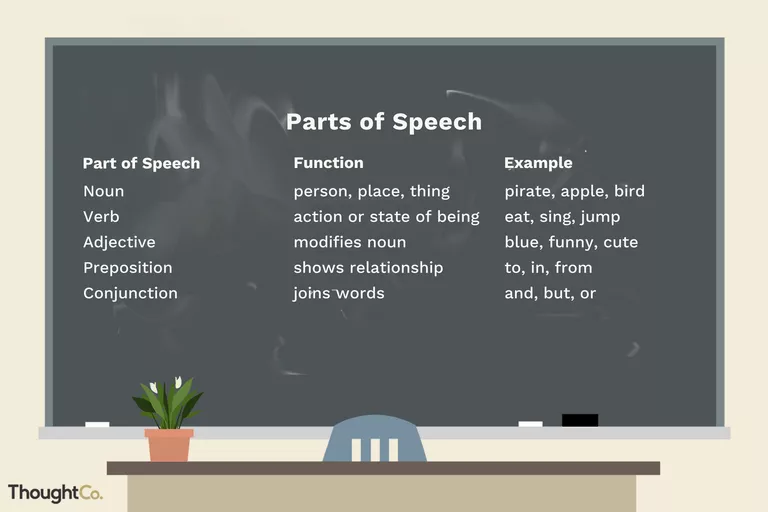

In English there are eight parts of speech: noun, pronoun, verb, adjective, adverb, preposition, conjunction, and interjections. 

Considering parts of speech is important, because a noun may be mistaken for the same word, but used a verb. For example, _saw_ can be an object that we use for cutting wood, but _saw_ can also be the past tense of _to see_. The lemma for the former one would be _saw_, while for the latter it would be _see_.

Let's take a look at some examples, and see how they do.

### First approach

In [ ]:
# WordNet Lemmatization on example
# Lemmatization is for verbs- i.e. swim, swam, and swum, should be lemmanized to "swim"

from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemma = WordNetLemmatizer()
words = ["leaf", 'leaves', 'swim', 'swam', 'swum', 'eat', 'ate', 'are', 'striped', 'best']
for w in words: 
    print(w, ":", lemma.lemmatize(w)) 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
leaf : leaf
leaves : leaf
swim : swim
swam : swam
swum : swum
eat : eat
ate : ate
are : are
striped : striped
best : best


As you can see, the lemmatization shown above did not do what we wanted it to do! This is because the function does not know the context of each word correctly. We have to provide the context to the function manually, which known as the Part-Of-Speech (POS) tag.

### Adding some POS TAGS hints for the lemmatizer

Lets give more hints to the ``lemmatize`` method.

In particular we will tell it we are dealing with verbs ('v')



In [ ]:
print("*********Let's see how POS works in lemmatization**********")
print('swam', ":", lemma.lemmatize('swam', 'v')) 
print('ate', ":", lemma.lemmatize('ate', 'v'))

*********Let's see how POS works in lemmatization**********
swam : swim
ate : eat


### Finding POS TAGS of a word

NLTK has a ``pos_tag`` function that tries to infer the POS tag of each word of a sentence.

Lets see how it deals with some words.

In [ ]:
# NLTK provides a method which provide POS tag of each word

print("*********Some examples of the pos_tag method in NLTK********")
print(nltk.pos_tag(['ran']))
print(nltk.pos_tag(['leaves']))
print(nltk.pos_tag(['are']))
print(nltk.pos_tag(['swam']))
print(nltk.pos_tag(['ate']))


*********Some examples of the pos_tag method in NLTK********
[('ran', 'NN')]
[('leaves', 'NNS')]
[('are', 'VBP')]
[('swam', 'NN')]
[('ate', 'NN')]


### List of POS TAGS

It provides a **bunch** of tags... You can learn what each means with the ``nltk.help.upenn_tagset``  function.

In [ ]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

### Different POS TAGS, different lemmas

Sometimes words have different lemmas based on their POS tag.

**Activity**: why might ran be a noun as well as a verb? (Hint: [Ran is a god of scandinavian mythology](https://en.wikipedia.org/wiki/R%C3%A1n)).
What other words may have different POS tags, and therefore, lemmes?


In [ ]:
print("**********Example of different lemmes for a word based on POS tag*********")
print("ran with pos tag v (verb): ", lemma.lemmatize("saw", 'v'))
print("ran with pos tag n (noun): ", lemma.lemmatize("saw", 'n'))


**********Example of different lemmes for a word based on POS tag*********
ran with pos tag v (verb):  saw
ran with pos tag n (noun):  saw


### Inferring POS TAGS from a sentence

Lets see how it deals with context:




In [ ]:
sentences = ["he leaves","green leaves"]

# Note: pos_tag acts on tokens, so we use word_tokenize here.

[print(x,  nltk.pos_tag(nltk.word_tokenize(x))) for x in sentences]
pass

he leaves [('he', 'PRP'), ('leaves', 'VBZ')]
green leaves [('green', 'JJ'), ('leaves', 'NNS')]


The lemmatizer has done a good job! The word "leaves" could be either a noun or a verb, depending on it's context. We can see that, in the first sentence, leaves is correctly identified as a verb, thanks to it's preceeding pronoun "he". "Green" is an adjective, and in English, adjectives often preceed the nouns they modify—which helped identify leaves as a noun in the second sentence.

### Lemmatization with the pos_tag function

We can make the following function to map the POS tag returned using NLTK method to tags which WordNetLemmatizer accepts:


In [ ]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    
    # First letter of POS_TAG assigned in upper case
    
    tag = nltk.pos_tag([word])[0][1][0].upper()
    
    # first [0] is the first token received by pos_tag
    # [1] is the pos_tag
    # last [0] is the first character of the pos-tag 

    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)



Lets test our function:

In [ ]:
print("***********Map POS tag returned from pos_tag to use in WordNetLemmatizer********")
word = 'feet'
print(word,'maps to',lemma.lemmatize(word, get_wordnet_pos(word)), 'with the WordNetLemmatizer-tag',get_wordnet_pos(word))

***********Map POS tag returned from pos_tag to use in WordNetLemmatizer********
feet maps to foot with the WordNetLemmatizer-tag n


In [ ]:
# Let's try again for the above example words

for w in words: 
    print(w, ":", lemma.lemmatize(w, get_wordnet_pos(w))) 

leaf : leaf
leaves : leaf
swim : swim
swam : swam
swum : swum
eat : eat
ate : ate
are : be
striped : strip
best : best


### Lemmatization of our data

That looks much better! Let's try it on our data:

In [ ]:
# WordNet Lemmatization on our data

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemma = WordNetLemmatizer()


df['token_lemma'] = df['tokens'].apply(lambda x: [lemma.lemmatize(words_sent) for words_sent in x])   
print(df['token_lemma'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
0    [a, communication, scholar, we, aim, to, estab...
1    [transparency, openness, and, reproducibility,...
2    [what, proportion, of, published, research, is...
3    [pervasive, failure, to, replicate, published,...
4    [we, live, in, an, era, of, trepidation, over,...
5    [century, perhaps, suggesting, a, different, s...
6    [there, is, increasing, concern, that, most, c...
7    [powerful, new, social, science, data, resourc...
8    [but, even, within, those, limit, the, opennes...
9    [open, science, is, an, umbrella, term, encomp...
Name: token_lemma, dtype: object


## Putting it all together—preprocessing our data in one go.

Congratulations! You've learned the key preprocessing steps for NLP. Now we'll take the concepts we've learned and apply them in one neat chunk of code to our dataset.

In [ ]:
# Preprocessing of our data - all at once

# Lower case
lower_case = df['raw_text'].apply(lambda x: x.lower())

# Punctuation removing
punc_remove = lower_case.apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', ' ', x ))

# Tokenization
tokens = punc_remove.apply(word_tokenize)

# Remove words that contain non-alphabetic characters (i.e, not a-z)
tokens = tokens.apply(lambda x: [word for word in x if word.isalpha()])

# Stop words removing
tokens = tokens.apply(lambda x: remove_stopwords(x, nltk_stop_words))

# Stemming
tokens = tokens.apply(lambda x: [ps.stem(word) for word in x])

# Lemmatising
tokens = tokens.apply(lambda x: [lemma.lemmatize(word) for word in x])  

print(tokens)

0    [commun, scholar, aim, establish, reliabl, rob...
1    [transpar, open, reproduc, readili, recogn, vi...
2    [proport, publish, research, like, fals, low, ...
3    [pervas, failur, replic, publish, work, rais, ...
4    [live, era, trepid, futur, scienc, noteworthi,...
5    [centuri, perhap, suggest, differ, stanc, edit...
6    [increas, concern, current, publish, research,...
7    [power, new, social, scienc, data, resourc, em...
8    [even, within, limit, open, advoc, would, gian...
9    [open, scienc, umbrella, term, encompass, mult...
Name: raw_text, dtype: object


In [ ]:
def prep_fun(input_text):
  # Lower case
  lower_case = input_text.lower()

  # Punctuation removing
  punc_remove = re.sub(r'[^a-zA-Z0-9\s]', ' ', lower_case )

  # Tokenization
  tokens = word_tokenize(punc_remove)

  # Remove words that contain non-alphabetic characters (i.e, not a-z)
  tokens = [word for word in tokens if word.isalpha()]

  # Stop words removing
  tokens = remove_stopwords(tokens, nltk_stop_words)

  # Stemming
  tokens = [ps.stem(word) for word in tokens]

  # Lemmatising
  tokens = [lemma.lemmatize(word) for word in tokens] 
  return tokens

tokens2 = df['raw_text'].apply(prep_fun)
print(tokens2)

0    [commun, scholar, aim, establish, reliabl, rob...
1    [transpar, open, reproduc, readili, recogn, vi...
2    [proport, publish, research, like, fals, low, ...
3    [pervas, failur, replic, publish, work, rais, ...
4    [live, era, trepid, futur, scienc, noteworthi,...
5    [centuri, perhap, suggest, differ, stanc, edit...
6    [increas, concern, current, publish, research,...
7    [power, new, social, scienc, data, resourc, em...
8    [even, within, limit, open, advoc, would, gian...
9    [open, scienc, umbrella, term, encompass, mult...
Name: raw_text, dtype: object


In [ ]:
df['prep'] = tokens

# Mini Hack Workshop Part 2:

## Extracting topics from papers using Natural Language Processing and evaluating the output


**Objective:** \

**Parts 1-3:**
Covered in the first part of the workshop introduced NLP, the corpus to be used, and how to preprocess texts.

**Part 4**: 
We will learn how to identify topics in texts using some simple methods.

**Part 5:**
We will use topic modelling to extract topics from our text corpus. 

**Part 6:**
We will break into different groups to see how by changing different settings the topics extracted change. Discuss which are the best settings/set of topics.

**Inroductory slides** \
...

*This event was created and organized by the following people (listed in alphebtical order by last name): Maria Balaet, Violeta Menendez Gonzalez, Danielle Kurtin, Yorguin Mantilla Ramos, Roonak Rezvani, Constantin Orasan, and Zhaoying Yu*




In [ ]:
%%html
<iframe src="https://docs.google.com/presentation/d/e/2PACX-1vQTbUv07uhkMDLCp_hCTUIIfwhChx2JohhpA7tsU5uSBCV-PaylUv7O9JRBItd2dQ/embed?start=false&loop=false&delayms=3000" frameborder="0" width="1000" height="700" allowfullscreen="true" mozallowfullscreen="true" webkitallowfullscreen="true"></iframe>

## Importing packages
After running the cell below you will need to restart the runtime- this is so the updated versions of the openpyxl works.

In [ ]:
# we need to do this first if we want to visualise the results
# after that restart the kernel from Runtime menu option
!pip install pyLDAvis
!pip install openpyxl --upgrade

## Recap: Import the necessary packages to access the data 

We need to first access the relevant data. This is something covered in the first session, so we going to cover it very quickly. Have a look there for more details. 

In [ ]:
# we read now the data from the Excel file

import pandas as pd
import numpy as np

df = pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vT0w1573DkqyYWfe9TpxV0qgINxzcALFpk8UmbSwImKziPMjOh0YBFE2umvSBW2zHQUJCVtryzVz2iN/pub?output=xlsx')

We print the first five rows from the dataframe to make sure the data is imported correctly. If we want we can expand the cells to see the complete text. 

In [ ]:
df.head()

,paper_link,paper_id,raw_text
0,https://academic.oup.com/joc/article/71/1/1/58...,1.0,"As Communication scholars, we aim to establish..."
1,https://www.science.org/doi/10.1126/science.aa...,2.0,"Transparency, openness, and reproducibility ar..."
2,https://www.nature.com/articles/s41562-016-0021,3.0,What proportion of published research is likel...
3,https://journals.plos.org/plosbiology/article?...,4.0,Pervasive failures to replicate published work...
4,https://journals.sagepub.com/doi/pdf/10.1177/0...,5.0,We live in an era of trepidation over the futu...


Finally we need to preprocess the texts in order to have them ready for extracting the topics. We will do the same steps as yesterday, but we will warp everything in a function. As we did yesterday, in order to perform the preprocessing we need to import the relevant modules. 

In [ ]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import re

lemma = WordNetLemmatizer()
nltk_stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


During todays workshop you will be asked to try different settings. One of the most important decisions you need to take in an NLP pipeline is to decide what kind of preprocessing you need to perform. There is no correct answer because the decisions you need to take depend on the data you have and your task. Good preprocessing can lead to better/clearer results, poor preprocessing can lead to loss of information. 

In todays workshop you will have the chance to modify the two functions below to see how the results chance. Most of the changes you will make will be in the ``prep_fun``. 

In [ ]:
def remove_stopwords(tokens, stop_words):
  filtered_sentence = [] 

  for w in tokens: 
      if w not in stop_words: 
          filtered_sentence.append(w)

  return filtered_sentence


def prep_fun(input_text):
  # Lower case
  lower_case = input_text.lower()

  # Punctuation removing
  punc_remove = re.sub(r'[^a-zA-Z0-9\s]', ' ', lower_case )

  # Tokenization
  tokens = nltk.word_tokenize(punc_remove)

  # Remove words that contain non-alphabetic characters (i.e, not a-z)
  tokens = [word for word in tokens if word.isalpha()]

  # Stop words removing
  tokens = remove_stopwords(tokens, nltk_stop_words)

  # Lemmatising
  tokens = [lemma.lemmatize(word) for word in tokens] 

  return tokens

In [ ]:
df["prep"] = df['raw_text'].apply(prep_fun)
print("Before preprocessing")
print(df["raw_text"])
print()
print("After preprocessing")
print(df["prep"])

Before preprocessing
0    As Communication scholars, we aim to establish...
1    Transparency, openness, and reproducibility ar...
2    What proportion of published research is likel...
3    Pervasive failures to replicate published work...
4    We live in an era of trepidation over the futu...
5    century, perhaps suggesting a different stance...
6    There is increasing concern that most current ...
7    Powerful new social science data resources are...
8    But even within those limits, the openness I a...
9    Open Science is an umbrella term encompassing ...
Name: raw_text, dtype: object

After preprocessing
0    [communication, scholar, aim, establish, relia...
1    [transparency, openness, reproducibility, read...
2    [proportion, published, research, likely, fals...
3    [pervasive, failure, replicate, published, wor...
4    [live, era, trepidation, future, science, note...
5    [century, perhaps, suggesting, different, stan...
6    [increasing, concern, current, published, r

Now we have the texts ready to process in the ``df["prep"]`` column.

**Activity**: modify the above functions and process the texts again. See how the results of the methods below change. Suggested changes: do not remove the stopwords, do not perform lemmatisation, use stemming instead of lemmatisation.

## Finding what the papers are talking about

### Term frequency

One way to find what a document or collection of documents is about is to use the word frequency to determine the most important words. The assumption is that frequent words indicate the topic of a document/collection.  

We can use ``nltk.FreqDist`` to produce the frequency list from a given list. For example, if we want to produce the frequency list from the first document. 


In [ ]:
# This displays the 10 most common words from 
fd = nltk.FreqDist(df["prep"][0])
fd.most_common(10)

[('data', 48),
 ('research', 47),
 ('science', 45),
 ('practice', 42),
 ('communication', 39),
 ('researcher', 39),
 ('result', 38),
 ('open', 36),
 ('effect', 26),
 ('finding', 25)]

In [ ]:
fd = nltk.FreqDist(df["prep"][3])
fd.most_common(10)

[('open', 106),
 ('science', 97),
 ('data', 62),
 ('ecrs', 35),
 ('research', 34),
 ('analysis', 34),
 ('rrs', 29),
 ('also', 28),
 ('method', 27),
 ('may', 26)]

A nicer way to display the frequency list is as a word cloud using the ``wordcloud`` package. 

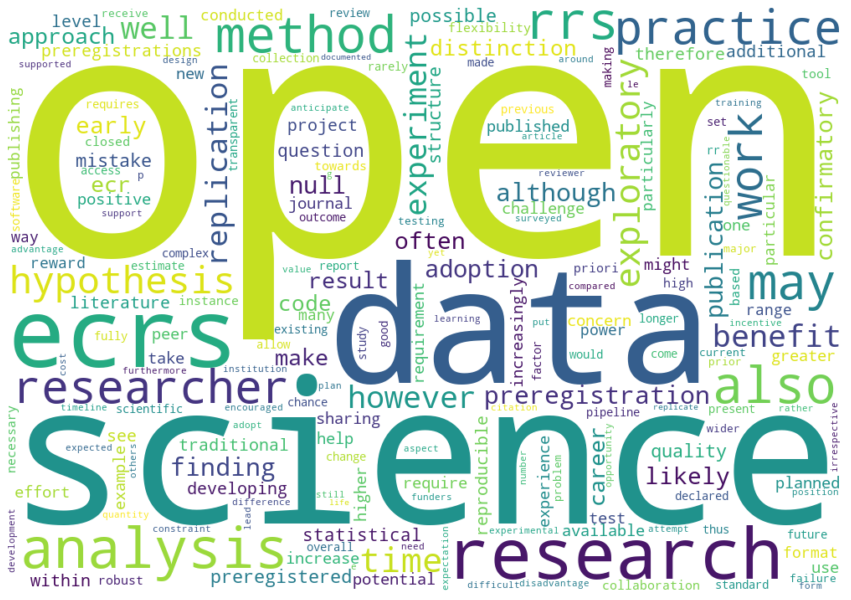

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white", width=1000, height=700, max_font_size=500).generate_from_frequencies(fd)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# the following line will combine all the texts in the variable text
# if you want to produce a word cloud from a certain text use text = df["prep"][0] for the first text
text = sum(df["prep"].tolist(), [])
print(text[:10])

['communication', 'scholar', 'aim', 'establish', 'reliable', 'robust', 'claim', 'communication', 'process', 'bedrock']


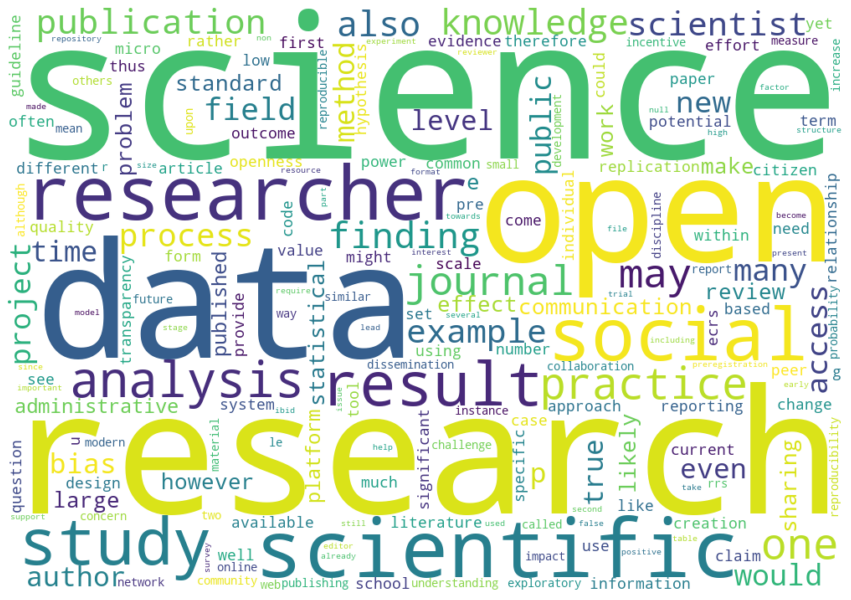

In [ ]:
freq_dict = nltk.FreqDist(text)   
wordcloud = WordCloud(background_color="white", width=1000, height=700, max_font_size=500).generate_from_frequencies(freq_dict)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Identifying important words from texts with TF*IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

all_docs = []
for text in df["prep"].tolist():    
    all_docs.append(" ".join(text))

vectorizer = TfidfVectorizer(max_df=.65, min_df=1, stop_words=None, use_idf=True, norm=None)
transformed_documents = vectorizer.fit_transform(all_docs)

In [ ]:
df_tfidf_sklearn = pd.DataFrame(transformed_documents.toarray(),columns=vectorizer.get_feature_names())
df_tfidf_sklearn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abdullah,aberration,abides,ability,abjure,abolishing,abort,abovementioned,absence,absolutely,abstract,abstraction,abundant,academia,accelerate,accelerated,accelerates,accelerator,accept,acceptable,acceptance,accepted,accepting,accessed,accessibility,accessing,accidentally,acclaim,accompanied,accompanies,accompaniment,accompanying,accomplish,accorded,according,accordingly,account,accountability,accountable,...,withhold,withholding,witness,woman,wonder,wonky,word,worked,worker,workflow,workforce,world,worse,worst,worth,worthwhile,wrest,wrestling,write,writes,writing,written,wrong,wrongly,wrote,wu,wwii,xing,yale,yeong,yield,york,yorker,young,zendor,zone,zoo,zoology,zooniverse,zotero
0,2.299283,0.000000,0.000000,0.000000,1.606136,0.000000,0.000000,0.000000,2.704748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.011601,1.788457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.299283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.788457,2.011601,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.606136,0.000000,0.000000,0.000000,0.000000,0.000000,2.299283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.011601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.788457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.011601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.606136,0.000000,0.000000,1.451985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,3.212272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.011601,2.299283,2.704748,0.000000,2.704748,0.000000,6.034803,1.788457,2.299283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.788457,0.000000,2.011601,2.704748,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.606136,0.000000,0.000000,4.355955,0.000000,0.000000,0.000000,0.000000,1.606136,0.000000,0.000000,2.704748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.576915,2.011601,0.000000,0.000000,2.704748,0.000000,4.023202,2.011601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.023202,0.000000,0.000000,0.000000,0.000000,0.000000,1.788457,0.000000,3.576915,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.451985,0.000000,0.000000,0.000000,0.000000,1.606136,2.704748,0.000000,0.000000,0.000000,0.000000,1.788457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,2.704748,2.704748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.299283,0.000000,2.299283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.788457,0.000000,0.000000,0.000000,0.000000,2.704748,2.704748,0.000000,0.000000,0.000000,0.000000,2.704748,0.000000,3.576915,0.000000,1.788457,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.704

We can see which are the words with the highest scores in each document

In [ ]:
for index, row in df_tfidf_sklearn.iterrows():
  print("Document", index)
  row.sort_values(inplace=True, ascending=False)
  print(row.iloc[:10])
  print()

Document 0
replicability      45.985660
qualitative        41.387094
sample             26.150812
replication        21.779777
qrps               21.637985
scholar            20.879765
quantitative       20.693547
several            17.667494
preregistration    16.061358
statistically      14.519851
Name: 0, dtype: float64

Document 1
guideline      19.273630
code           10.730744
adoption       10.730744
norm            8.942287
committee       8.046404
top             7.259926
policy          7.259926
transparent     7.259926
ii              6.897849
publisher       6.424543
Name: 1, dtype: float64

Document 2
reporting       50.076806
pre             41.759531
guideline       35.334988
registration    26.826860
evidence        24.683747
evaluation      23.249946
trial           22.485901
medicine        16.228489
false           16.096116
statement       16.094981
Name: 2, dtype: float64

Document 3
ecrs               80.474904
rrs                66.679207
hypothesis         30.4


## Topic modelling 

So, we've gone through a lot of work just to get our corpus ready for topic modelling. We've tokenized, stemmed, lemminized, and removed the stopwords from our text- now we're ready to extract topics!

To do this, we'll use the following methods:

1. Identifying the number of optimal topics in our dataset
2. Implementation of LDA as topic modelling algorithm to extract the optimal number of topics
3. Rating of top 20 sentences per topic to define the topic 
4. Interpretation of top opinions to label/name the topic

## Topics

Topics are clusters of similar content. The underlying assumption is that every document comprises a statistical mixture of topics, i.e. a statistical distribution of topics that can be obtained by “adding up” all of the distributions for all the topics covered. What topic modelling methods do is try to figure out which topics are present in the documents of the corpus and how strong that presence is.

## What is topic modelling? Why is it useful?

Topic modelling is an unsupervised machine learning technique that’s capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents.

Topic modelling involves counting words and grouping similar word patterns to infer topics within unstructured data. Let's say you want to write a song about research papers. Instead of spending hours reading dozens of papers, you could analyze them with a topic modeling algorithm.

By detecting patterns such as word frequency and distance between words, a topic model clusters feedback that is similar, and words and expressions that appear most often. With this information, you can quickly deduce what each set of texts are talking about. Remember, this approach is ‘unsupervised’ meaning that no training is required. 

##Latent Dirichlet Allocation (LDA)

LDA is one of the most popular topic modelling methods. It's aim is to find the topics within a body of text based on the words it contains.

Before getting into the details of the Latent Dirichlet Allocation model, let’s look at the words that form the name of the technique. The word ‘Latent’ indicates that the model discovers the ‘yet-to-be-found’ or hidden topics from the documents. ‘Dirichlet’ indicates LDA’s two assumptions of LDA - that both the distribution of topics withinin a document and the distribution of words within each topic are Dirichlet distributions. ‘Allocation’ indicates the distribution of topics in the document.  

LDA assumes that the words within a document can be used determine the topics. LDA assigns each word in a document to different topic, then maps the entire document to a list of topics. Put another way, LDA computes a many-to-many relationship between topics and words, and thus a many-to-many relationship between documents and topics.

It is important to note that LDA ignores the order of occurrence of words and the syntactic information. It treats documents just as a collection of words or a bag of words. LDA assumes that each document is generated by a statistical generative process. That is, each document is a mix of topics, and each topic is a mix of words.

To delve deeper into how LDA works, you can read additional resorces: https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d 

and the original paper: https://proceedings.neurips.cc/paper/2001/file/296472c9542ad4d4788d543508116cbc-Paper.pdf

##Coherence

Topic Coherence Score is a measure of how good a topic model is at generating coherent topics. A higher coherence score indicates a better topic model.

A coherent topic should be semantically interpretable and not an artifact of statistical inference though! Unfortunately, this can still only be done by humans checking over the topics. We propose a method for doing so, guided by coherence, where we interpret the most representative documents for a given topic to define the topic. 


In [ ]:
## Import packages and read in data

from time import time
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
from sklearn.model_selection import ShuffleSplit, train_test_split
import numpy as np
import itertools
import logging
import pandas as pd
import seaborn as sns

np.random.seed(100)

In [ ]:
# Topics range
min_topics = 1
max_topics = 20
step_size = 2
topics_range = range(min_topics, max_topics, step_size)

In [ ]:
# Corpus (series of lists of cleaned text)
texts = df['prep']

# Create Dictionary (mapping between words and an integer ID)
id2word = corpora.Dictionary(texts)

# Term Document Frequency - doc2bow: Document to bag-of-words
# corpus is a list of (a,b) pairs, where a is the index of the word in
# the document, and b is the index of the word in the dictionary (Is this true?)
corpus = [id2word.doc2bow(text) for text in texts]

Here we are calculating the coherence of different number of topics in order to identify the optimal number of topics to split our document into.

**Activity:** try different coherence method and plot the results. Does it change the optimal number of topics?

In [ ]:
def determine_coherence(n_topics, coherence_measure = 'c_v', texts = texts, corpus = corpus, id2word = id2word):

    # LDA Model
    lda_model = LdaMulticore(corpus=corpus,
                             id2word=id2word,
                             num_topics=n_topics, 
                             random_state=100,
                             workers=20,
                             iterations=150,
                             minimum_probability=0)
                                                                 
    # if you want you can save the model for future use. Particularly useful
    # if you have big corpora which take long time to process
    # lda_model.save('lda_model_n_topics_'+str(n_topics))

    # Measure the coherence of the LDA model
    cv_coherence_model_lda = CoherenceModel(model=lda_model,
                                            texts=texts,
                                            dictionary=id2word,
                                            coherence=coherence_measure)
    cv_coherence_total = cv_coherence_model_lda.get_coherence()

    return cv_coherence_total

In [ ]:
## NOTE
#  We are using CV coherence due to our personal research experience and
#  established research which suggests it is the most closely correlated
#  coherence measure with human judgement, but there are other methods to
#  calculate coherence. Have a play with the following three methods, and
#  compare the outcome to those generated using cv coherence

# Other values accepted are 'u_mass', 'c_uci', 'c_npmi'
# Fastest method - ‘u_mass’, 
# ‘c_uci’ also known as c_pmi. 
# For ‘u_mass’ corpus should be provided, if texts is provided, it will be 
# converted to corpus using the dictionary. For ‘c_v’, ‘c_uci’ and ‘c_npmi’ 
# texts should be provided (corpus isn’t needed)

coherence_measure = 'c_v'
coh_results = {'Topics': [], coherence_measure +'_Coherence_avg': []}

for i in topics_range:
  print("Using", i, "topics")
  coherence_average = determine_coherence(i, coherence_measure)
  coh_results['Topics'].append(i)
  coh_results[coherence_measure +'_Coherence_avg'].append(coherence_average)

Using 1 topics
Using 3 topics
Using 5 topics
Using 7 topics
Using 9 topics
Using 11 topics
Using 13 topics
Using 15 topics
Using 17 topics
Using 19 topics


In [ ]:
import pprint as pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(coh_results)

{   'Topics': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'c_v_Coherence_avg': [   0.2550689911114846,
                             0.24594332957334666,
                             0.2641959978848657,
                             0.26409401778204294,
                             0.28004812704353865,
                             0.2874158773677593,
                             0.2865398574792638,
                             0.306715307433703,
                             0.30952845632908127,
                             0.30671552581622824]}


Next, we are going to plot the results. The optimal number of topics corresponds to the number of topics where we observe the highest coherence.
There are multiple coherence formulas. Cv coherence has previously been illustrated to be the most highly correlated with human judgement. This is why we are going to use it to find out the most optimal number of topics.

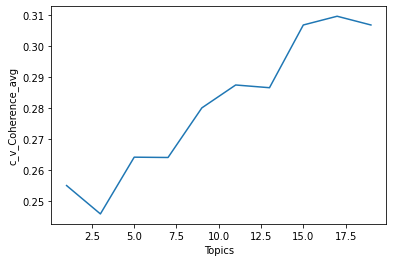

In [ ]:
sns.lineplot(x='Topics', y=coherence_measure +'_Coherence_avg', data=pd.DataFrame(coh_results))

Now we are going to split the documents into the optimal number of topics, and identify the ones that define a topic mostly

In [ ]:
# Original papers content
col_original = 'raw_text'

n_topics = 5
n_opinions = 3
data = df

#model
lda_model = LdaMulticore(corpus=corpus,
                         id2word=id2word,
                         num_topics=n_topics,
                         random_state=100,
                         workers=20,
                         iterations=150,
                         minimum_probability=0)
    
#model_topics = lda_model.show_topics(formatted=True)
#print(model_topics)
    
# Get topic distribution probabilities
all_topics = lda_model.get_document_topics(corpus, minimum_probability=0.0)
doc_topic_dist_proc = gensim.matutils.corpus2csc(all_topics)
doc_topic_dist_numpy = doc_topic_dist_proc.T.toarray()

# Get dominant topic
topicnames = ['Topic_' + str(i+1) for i in range(0,n_topics,1)]
all_topics_df = pd.DataFrame(doc_topic_dist_numpy,columns=topicnames)
all_topics_df['dominant_topic_contribution'] = all_topics_df.max(axis = 1) 
all_topics_df['dominant_topic'] = np.argmax(all_topics_df.values, axis=1)
all_topics_df['dominant_topic_name'] = "Topic "+(all_topics_df['dominant_topic']+1).astype(str)
    
# Append df 
all_topics_df_full = all_topics_df.merge(data[['paper_id',col_original]],left_index=True,right_index=True)
all_topics_df_full.to_csv('all_labelled_opinions_'+col_original+'_gensim_overfitted.csv')
sneak_peak = all_topics_df_full[[col_original]]
sneak_peak = sneak_peak.sample(frac=1).reset_index(drop=True)
sneak_peak.to_csv('quick_data_sneak_peak_'+col_original+'.csv')
    
# Get the top 20 opinions per topic df and output it as csv
top_opinions_df = all_topics_df_full.groupby('dominant_topic_name').apply(lambda x: x.nlargest(n_opinions, 'dominant_topic_contribution')).reset_index(drop=True)
top_opinions_df.to_csv('labelled_validation_'+col_original+'_gensim_overfitted.csv')


Here we identify the most relevant documents to define a topic


In [ ]:

#output .csv for validation with TOP opinions, dominant topic name and column to insert validator opinion
validation_sheet1 = top_opinions_df[[col_original,'dominant_topic_name']]
validation_sheet1['validation']='yes/no'
validation_sheet1=validation_sheet1.sample(frac=1).reset_index(drop=True) #this shuffles the order!!
validation_sheet1.to_csv('validation_top_opinions_'+col_original+'_gensim_overfitted.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#print top words per topic (easier to make the validation for top words manual)

for idx, topic in lda_model.show_topics(formatted=False, num_words= 10):
    print('Topic: {} \nWords: {}'.format(idx, [w[0] for w in topic]))

Topic: 0 
Words: ['science', 'research', 'open', 'data', 'scientific', 'researcher', 'one', 'knowledge', 'result', 'social']
Topic: 1 
Words: ['science', 'data', 'research', 'open', 'social', 'scientific', 'analysis', 'researcher', 'study', 'practice']
Topic: 2 
Words: ['science', 'open', 'research', 'data', 'social', 'scientific', 'researcher', 'result', 'knowledge', 'analysis']
Topic: 3 
Words: ['research', 'science', 'result', 'data', 'open', 'study', 'practice', 'researcher', 'journal', 'standard']
Topic: 4 
Words: ['research', 'science', 'open', 'data', 'study', 'scientific', 'one', 'field', 'may', 'also']


This is where we can find all the documents and their topics

In [ ]:
all_topics_df_full

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,dominant_topic_contribution,dominant_topic,dominant_topic_name,paper_id,raw_text
0,0.000072,0.546505,0.000072,0.453279,0.000072,0.546505,1,Topic 2,1.0,"As Communication scholars, we aim to establish..."
1,0.000241,0.020897,0.000240,0.978382,0.000241,0.978382,3,Topic 4,2.0,"Transparency, openness, and reproducibility ar..."
2,0.000056,0.999775,0.000056,0.000057,0.000056,0.999775,1,Topic 2,3.0,What proportion of published research is likel...
3,0.000068,0.999728,0.000068,0.000068,0.000068,0.999728,1,Topic 2,4.0,Pervasive failures to replicate published work...
4,0.000056,0.999776,0.000056,0.000056,0.000056,0.999776,1,Topic 2,5.0,We live in an era of trepidation over the futu...
5,0.000060,0.999761,0.000060,0.000059,0.000060,0.999761,1,Topic 2,5.0,"century, perhaps suggesting a different stance..."
6,0.000083,0.336708,0.000082,0.000083,0.663045,0.663045,4,Topic 5,6.0,There is increasing concern that most current ...
7,0.000069,0.999723,0.000069,0.000069,0.000069,0.999723,1,Topic 2,7.0,Powerful new social science data resources are...
8,0.738486,0.261242,0.000091,0.000091,0.000091,0.738486,0,Topic 1,8.0,"But even within those limits, the openness I a..."
9,0.000051,0.589764,0.000051,0.000050,0.410084,0.589764,1,Topic 2,9.0,Open Science is an umbrella term encompassing ...


This is what we are going to use for the topics interpretation

In [ ]:
print(validation_sheet1)

                                            raw_text  ... validation
0  We live in an era of trepidation over the futu...  ...     yes/no
1  There is increasing concern that most current ...  ...     yes/no
2  What proportion of published research is likel...  ...     yes/no
3  But even within those limits, the openness I a...  ...     yes/no
4  century, perhaps suggesting a different stance...  ...     yes/no
5  Transparency, openness, and reproducibility ar...  ...     yes/no

[6 rows x 3 columns]


 Next, we are going to read the .csv files we have generated and interpret the topics based on 
 the top 10 research papers which mostly define each topic.

In [ ]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.006472 -0.018309       1        1  75.674439
4      0.017546  0.004184       2        1  11.338867
3     -0.028215 -0.000564       3        1   7.282828
0      0.002275  0.002738       4        1   5.696873
2      0.001921  0.011951       5        1   0.006993, topic_info=         Term        Freq       Total Category  logprob  loglift
865   science  621.000000  621.000000  Default  30.0000  30.0000
238      data  478.000000  478.000000  Default  29.0000  29.0000
836  research  519.000000  519.000000  Default  28.0000  28.0000
655      open  384.000000  384.000000  Default  27.0000  27.0000
910    social  158.000000  158.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
45       also    0.004162  111.162963   Topic5  -6.1879  -0.6247
532   journal    0.004180  119.235973   Topic5  -6.1837  -0.6906
6      access    0.003655   77.427249   Topic5  -6.3180  -0.3931
583       may    0.003996  116.446917   Topic5  -6.2286  -0.7118
940     study    0.004120  146.711574   Topic5  -6.1982  -0.9124

[427 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
6         1  0.774921   access
6         2  0.154984   access
6         3  0.025831   access
6         4  0.038746   access
2444      1  0.715527  acclaim
...     ...       ...      ...
4678      4  0.211795  written
1078      1  0.788945      yet
1078      2  0.094673      yet
1078      3  0.031558      yet
1078      4  0.094673      yet

[682 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 1, 3])